# Janhavi Mahesh Karpe 22102B2004
## CMPN-BE-B

[Github Link](https://github.com/KJanhavi04/ML-24-25.git)

---

ML PROBLEM STATEMENT 5

1. Data Preparation
1.1 Classification Dataset: Breast Cancer Wisconsin
In this section, we load and prepare the Breast Cancer Wisconsin dataset

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)

# Label encoding for target variable
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Split features and target
X = data.drop(['ID', 'Diagnosis'], axis=1)
y = data['Diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


1.2 Regression Dataset: California Housing

Next, we load and prepare the California Housing dataset.

In [ ]:
# Load the dataset
housing_data = pd.read_csv("/content/sample_data/california_housing_test.csv")

# Split features and target
X_housing = housing_data.drop(['median_house_value'], axis=1)
y_housing = housing_data['median_house_value']

# Train-test split
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)


2. Implementing XGBoost Models
2.1 XGBoost Classifier (Breast Cancer Wisconsin)

In this section, we implement and evaluate the XGBoost classifier for the classification task.

Accuracy: 0.956140350877193
Precision: 0.9523809523809523
Recall: 0.9302325581395349
F1-Score: 0.9411764705882353


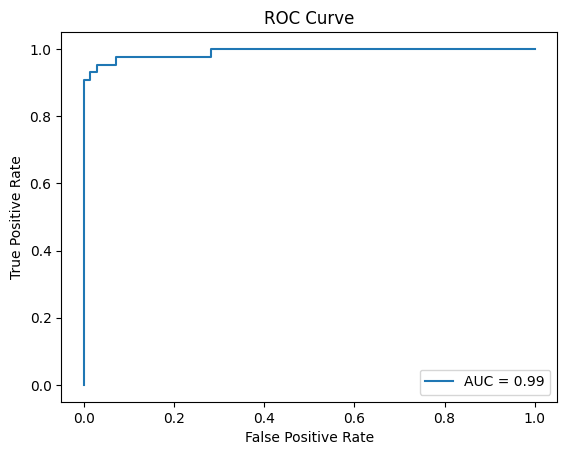

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# XGBoost classifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

# Prediction
y_pred = xgb_clf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# ROC curve
y_pred_prob = xgb_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


2.2 XGBoost Regressor (California Housing)

Here, we implement and evaluate the XGBoost regressor for the regression task.

Mean Squared Error: 3183888906.605376
R-Squared: 0.7471804669512697


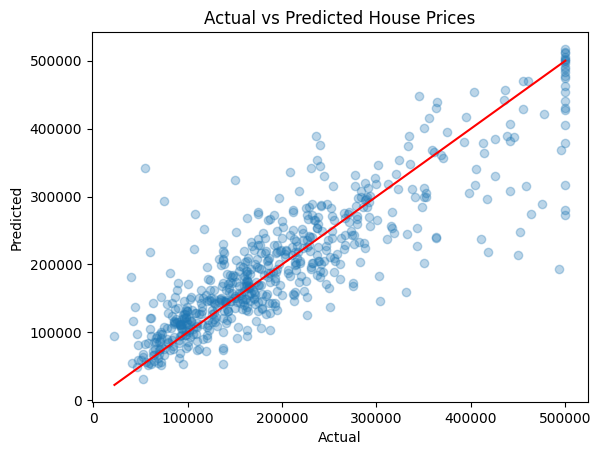

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# XGBoost regressor
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train_housing, y_train_housing)

# Prediction
y_pred_housing = xgb_reg.predict(X_test_housing)

# Evaluation metrics
mse = mean_squared_error(y_test_housing, y_pred_housing)
r2 = r2_score(y_test_housing, y_pred_housing)

# Display metrics
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

# Plot actual vs predicted
plt.scatter(y_test_housing, y_pred_housing, alpha=0.3)
plt.plot([min(y_test_housing), max(y_test_housing)], [min(y_test_housing), max(y_test_housing)], color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted House Prices")
plt.show()


4. Comparing with Random Forest
To compare the performance, we implement Random Forest models for both classification and regression tasks.

4.1 Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)

# Evaluate performance (compare with XGBoost)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")


Random Forest Accuracy: 0.9649122807017544


4.2 Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_housing, y_train_housing)
rf_y_pred_housing = rf_reg.predict(X_test_housing)

# Evaluate performance (compare with XGBoost)
rf_mse = mean_squared_error(y_test_housing, rf_y_pred_housing)
print(f"Random Forest MSE: {rf_mse}")


Random Forest MSE: 3344489182.9192643
